# 00 - Pilot
## Lab Notes - 2022-02-28


### Working dir:

``` sh
00-data
├── echo-reports
│   ├── 2022-02-28
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode)-01.csv
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode)-01.txt
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode).csv
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode).txt
│   │   ├── E5XX-1564_Transfer_1646039578.csv
│   │   ├── E5XX-1564_Transfer_1646039578_Exceptions.csv
│   │   ├── E5XX-1564_Transfer_1646039578_Exceptions.txt
│   │   ├── E5XX-1564_Transfer_1646039578.txt
│   │   ├── E5XX-1564_Transfer_1646040315.csv
│   │   ├── E5XX-1564_Transfer_1646040315_Exceptions.csv
│   │   ├── E5XX-1564_Transfer_1646040315_Exceptions.txt
│   │   └── E5XX-1564_Transfer_1646040315.txt
│   └── 2022-02-28-00-echo-protocol.epr
├── picklists
│   ├── 00-picklist_0.csv
│   └── 00-picklist.csv
├── platereader
│   ├── 2022-02-28-s48-r1-4-blank.csv.CSV
│   ├── 2022-02-28-s48-r1-4-prot-cold.csv.CSV
│   └── 2022-02-28-s48-r1-4-prot.csv.CSV
└── uv-vis
    ├── 2022-02-28-00-conc-check-01.csv
    └── 2022-02-28-00-conc-check-02.csv

5 directories, 20 files
```

## Echo - Compound Dispensing

Racks 1-4 (96 well plates) were used to fill the 384 well low dead volume (ldv) name brand source plate.

info:
[pdf of labcyte consumabes](https://storage.by.prom.st/205141_akusticheskie_dispenserny__e_echo._broshyura_eng.pdf)

Mapping:

| Rack 1 |   Rack 2   |
|------|---------|
| Rack 3 | Rack 4  |

On loading the picklist generated in [ref](ref) the echo client vis showed that it wasn't a 1:1 mapping.
I want to be able to do that before I start next time.

In [1]:
import pandas as pd

picklist = pd.read_csv('00-data/picklists/00-picklist.csv', index_col=0)

picklist.head()

,Cpd,SrcWell,Destination Plate Name,DestWell,Transfer Volume /nl
SrcPlate,,,,,
src-L1300-01,['S1005'],A1,dest-L1300-01,A1,1500.0
src-L1300-01,['S1011'],A3,dest-L1300-01,A3,1500.0
src-L1300-01,['S1013'],A5,dest-L1300-01,A5,1500.0
src-L1300-01,['S1014'],A7,dest-L1300-01,A7,1500.0
src-L1300-01,['S1021'],A9,dest-L1300-01,A9,1500.0


## Compound Dispensing
Dispensing (echo) 


On loading the picklist generated in ref the echo client vis showed that it wasn't a 1:1 mapping.
I want to be able to see that before I start next time.

I generated a 1:1 mapping on the fly, which brings the `echo` package's reason to exist into question.

In [2]:
import echo

pd.DataFrame([echo.hwells, echo.hwells, [1500]*len(echo.hwells)],
            index=['Src Well', 'Dest Well','Transfer Volume']).T.to_csv('00-data/picklists/01-picklist_0.csv')


Surveys and transfer reports are in `00-data/`.

``` sh
00-data
├── echo-reports
│   ├── 2022-02-28
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode)-01.csv
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode)-01.txt
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode).csv
│   │   ├── E5XX-1564_Survey_Source[1](UnknownBarCode).txt
│   │   ├── E5XX-1564_Transfer_1646039578.csv
│   │   ├── E5XX-1564_Transfer_1646039578_Exceptions.csv
│   │   ├── E5XX-1564_Transfer_1646039578_Exceptions.txt
│   │   ├── E5XX-1564_Transfer_1646039578.txt
│   │   ├── E5XX-1564_Transfer_1646040315.csv
│   │   ├── E5XX-1564_Transfer_1646040315_Exceptions.csv
│   │   ├── E5XX-1564_Transfer_1646040315_Exceptions.txt
│   │   └── E5XX-1564_Transfer_1646040315.txt
│   └── 2022-02-28-00-echo-protocol.epr
...
```

Plates not labelled (lazy), unclear which echo report belongs to which.
Retrospective analysis later.

The echo-dedicated laptop is straining under its own weight.
It's running an unactivated copy of windows (version?) - appearance is like 98.
Slow.

---

# Protein Dispensing
Thawed 2 protein samples: `#8` & `#49`.
```json
{id:8, 
 protein:'BM3 A82F/F87V - full length',
 purification:{date:'2018-07-02',
               notes:'https://benchling.com/james_engleback/f/lib_bs9uCcC8-grow-ups/etr_R6w0REsK-full-length-grow-up-07022018/edit',
               }
}
{id:49, 
 protein:'BM3 WT - heme domain',
 purification:{date:'2020-01-23',
               notes:{'purification':'https://benchling.com/james_engleback/f/lib_OuHcYcYG-expressionpurification/etr_1eaTka5w-bm3-wt-expression-purification',
                      expression:'missing'}
               }
}
```

`#8` was unusable, no P450 peak @420 nm.
used `#49` instead. (see spec below)

## Protein Concentrations
Diluted proteins 5 in 1000 in fresh assay buffer: 

```json
{'kpi':{'KPi-mM':100, 'pH':7.0, 'filtered':false, 'degassed':true}
```
## uv-vis data
Absorbance 200-800 nm in plastic cuvettes, which cause the < 300 nm mess.
Samples:
- **buffer blank**
- **sample8** - `id:8` in `kpi` $5 / 1000$
- **sample49** - `id:49` in `kpi` $5 / 1000$

``` sh
00-data/
└── uv-vis
    ├── 2022-02-28-00-conc-check-01.csv
    └── 2022-02-28-00-conc-check-02.csv

5 directories, 20 files
```

## note
`uv` needs fixing, had to fix it on the fly.



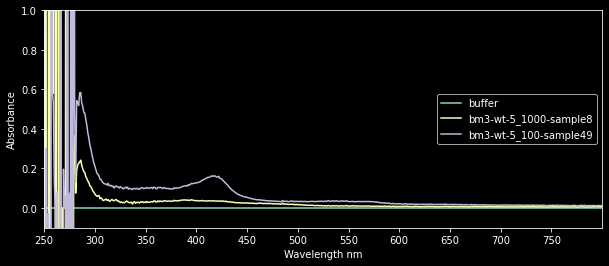

In [3]:
import uv
import matplotlib.pyplot as plt
plt.style.use('dark_background')

data = uv.P450('00-data/uv-vis/2022-02-28-00-conc-check-01.csv')
uv.plot_traces(data.norm)

In [4]:
data.concs(95) # extiction coefficient

buffer                   0.000000
bm3-wt-5_1000-sample8    0.367857
bm3-wt-5_100-sample49    1.656967
Name: P450 conc/uM, dtype: float64

In [5]:
c1 =  1.656967 / (5/1000)
v2 = 15_000 # ul
assert v2 > 384*30*1.2
c1

331.3934

In [6]:
def v1(c1,v2,c2):
    return (c2*v2)/c1

print(f'{v1(c1, v2, 10) } in {v2}ul')

452.63424075434216 in 15000ul


## Protein Dispensing
Used a auto-pipette to dispense 28ul into each well.
``` json
{
 testPlate:{protein:true},
 controlPlate:{protein:false}
}
```
The buffer was kept at room temperature prior to dispensing because of concerns over DMSO freezing.
Plates were centrifuged at 2,000 rpm for 2 min to remove bubbles.

## Reading
```json
{plateReader:{owner:'Dixon',
              model:'BMG ClarioStar',
              bookingSytem:false},
 protocol:{wavelengths:[220..800],
           resolution:1}
```

The read itself took about 10 minutes for all 384 wells, but 20 minutes to transfer and save the data to the dedicated machine, during which the clariostar client locks up.
I've spoken to BMG engineers a couple of times about this.
We could not find a solution.

It's strange that it takes that long becuase the exported csv (metadata + wavelenths * well absorbance) is only around 1.2 MB.

BMG MARS data analysis program is also painfully slow on any machine I've had the luck to try it on.

I'll look at the system monitor next time.

This JSON-everthing obsession is stupid. 
YAML would be far better.

## Data
MARS auto fills file extensions
``` sh
00-data/
└── platereader
    ├── 2022-02-28-s48-r1-4-blank.csv.CSV
    ├── 2022-02-28-s48-r1-4-prot-cold.csv.CSV
    └── 2022-02-28-s48-r1-4-prot.csv.CSV
```

## Cold run
On the fly test.
Aim was to test my theory that cold leads to scattering becuase of DMSO ice.
The plate was kept at 4 $^\circ$ C for about 20 minutes.

`2022-02-28-s48-r1-4-prot-cold.csv.CSV`

I dropped the control plate after it was first read, unfortuneately.
The human element coninures to be problematic.

## Upload

```sh
$ tar cfz 00-data.tar.gz 00-data/
$ linode-cli obj put 00-data.tar.gz james-engleback
```

----

## echo log analysis

### Summary:

- 38 wells were not dispensed, all because they were empty. Causes:
    - Empty wells in stock plates
    - Pipetting error - loose tip

I'll factor this in my analysis

In [39]:
echoFiles = '''00-data/echo-reports/2022-02-28-00-echo-protocol.epr
00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode).csv
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315_Exceptions.csv
00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode).txt
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315.txt
00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode)-01.csv
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578.csv
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578.txt
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315.csv
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315_Exceptions.txt
00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode)-01.txt
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578_Exceptions.txt
00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578_Exceptions.csv'''.split('\n')

sorted(echoFiles)

['00-data/echo-reports/2022-02-28-00-echo-protocol.epr',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode)-01.csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode)-01.txt',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode).csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode).txt',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578.csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578.txt',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578_Exceptions.csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646039578_Exceptions.txt',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315.csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315.txt',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315_Exceptions.csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Transfer_1646040315_Exceptions.txt']

- `.epr` - protocol generated from imported picklist by echo Plate Reformat client - xml, body encrypted using [AES-128](http://www.w3.org/2001/04/xmlenc#aes128-cbc).
- Survey files contain data on the detected well volume before dispensing - txt & csv
- Transfer reports log transfers - txt & csv. The two transfer ids are:
    - 1646039578
    - 1646040315

In [53]:
surveyFiles = sorted(filter(lambda s : 'Survey' in s, echoFiles))
transferFiles = sorted(filter(lambda s : 'Transfer' in s, echoFiles))
surveyFiles

['00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode)-01.csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode)-01.txt',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode).csv',
 '00-data/echo-reports/2022-02-28/E5XX-1564_Survey_Source[1](UnknownBarCode).txt']

In [76]:
from io import StringIO

class SurveyFile:
    def __init__(self, path):
        self.path = path
        self.metadata, self.details, self.instrument = self.read(path)
        self.df = pd.read_csv(StringIO(self.details), skiprows=1)
        self.df.index = self.df['Source Well']
    def read(self, path):
        with open(path) as f:
            data=f.read()
        return data.split('\n\n')[:3] # last item is empty
    
class TransferFile:
    def __init__(self, path):
        self.path = path
        self.metadata, _exceptions, _details, self.instrument = self.read(path)
        self.exceptions =  pd.read_csv(StringIO(_exceptions), skiprows=1)
        self.details =  pd.read_csv(StringIO(_details), skiprows=1)
    def read(self, path):
        with open(path) as f:
            data=f.read()
        return data.split('\n\n')[:4]
    
svy = SurveyFile(surveyFiles[0])
tx = TransferFile(transferFiles[0])
svy.df.head()

,Source Plate Name,Source Plate Barcode,Source Plate Type,Source Well,Survey Fluid Height,Survey Fluid Volume,Fluid Composition,Fluid Units,Fluid Type,Survey Status
Source Well,,,,,,,,,,
A1,Source[1],UnknownBarCode,384LDV_DMSO,A1,1.216,5.813,87.330,Percent,DMSO,NaN
A2,Source[1],UnknownBarCode,384LDV_DMSO,A2,0.373,1.813,90.810,Percent,DMSO,NaN
A3,Source[1],UnknownBarCode,384LDV_DMSO,A3,1.168,5.359,77.953,Percent,DMSO,NaN
A4,Source[1],UnknownBarCode,384LDV_DMSO,A4,1.326,5.968,73.188,Percent,DMSO,NaN
A5,Source[1],UnknownBarCode,384LDV_DMSO,A5,1.249,5.569,72.100,Percent,DMSO,NaN


In [77]:
print(f'Number of Exceptions: {len(tx.exceptions)}')

txx = tx.exceptions[['Source Well',
                     'Destination Well',
                     'Transfer Volume',
                     'Actual Volume',
                     'Transfer Status']]
txx.head()

Number of Exceptions: 38


,Source Well,Destination Well,Transfer Volume,Actual Volume,Transfer Status
0,C3,C3,1500,0,MM0202007: Problem calc. well fluid volume fc:...
1,G3,G3,1500,0,MM0202007: Problem calc. well fluid volume fc:...
2,B11,B11,1500,300,MM0202006: Problem calc. eo fc: 1.79144 ft: 0....
3,M15,M15,1500,0,MM0202007: Problem calc. well fluid volume fc:...
4,F20,F20,1500,0,MM0202007: Problem calc. well fluid volume fc:...


There are 2 types of error.
One corresponds to B11, which wasn't empty but still insufficient volume.
The other is empties.

In [78]:
txx['Transfer Status'].value_counts()

MM0202007: Problem calc. well fluid volume fc: 0 ft: 0    37
MM0202006: Problem calc. eo fc: 1.79144 ft: 0.370289       1
Name: Transfer Status, dtype: int64

Survey reports for exception wells:

In [80]:
svy.df.loc[txx['Source Well'],:]

,Source Plate Name,Source Plate Barcode,Source Plate Type,Source Well,Survey Fluid Height,Survey Fluid Volume,Fluid Composition,Fluid Units,Fluid Type,Survey Status
Source Well,,,,,,,,,,
C3,Source[1],UnknownBarCode,384LDV_DMSO,C3,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (3th row, 3th column), d..."
G3,Source[1],UnknownBarCode,384LDV_DMSO,G3,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (7th row, 3th column), d..."
B11,Source[1],UnknownBarCode,384LDV_DMSO,B11,0.439,1.958,80.119,Percent,DMSO,NaN
M15,Source[1],UnknownBarCode,384LDV_DMSO,M15,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (13th row, 15th column),..."
F20,Source[1],UnknownBarCode,384LDV_DMSO,F20,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (6th row, 20th column), ..."
A21,Source[1],UnknownBarCode,384LDV_DMSO,A21,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (1th row, 21th column), ..."
A23,Source[1],UnknownBarCode,384LDV_DMSO,A23,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (1th row, 23th column), ..."
B23,Source[1],UnknownBarCode,384LDV_DMSO,B23,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (2th row, 23th column), ..."
C23,Source[1],UnknownBarCode,384LDV_DMSO,C23,0.000,0.000,0.000,Percent,DMSO,"Data missing for well (3th row, 23th column), ..."
